# **Workshop on Attribute and Spatial Data Operations Taller**

In [1]:
import pandas as pd
import shapely
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
import rasterio

In [3]:
import sys
import topojson as tp

In [4]:
import pyproj

In [5]:
print("GeoPandas:", gpd.__version__)
print("Rasterio:", rasterio.__version__)

GeoPandas: 1.0.1
Rasterio: 1.4.3


In [6]:
path_area_estudio = r"C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/Area_Estudio/Area_Estudio_ProgSIG.shp"
df_area_estudio = gpd.read_file(path_area_estudio)

El área de estudio corresponde a cinco subzonas hidrografías aledaña y de influencia directa al PNN Chingaza, a saber, Río Guatiquía, Río Humea, Río Guacavía, Rio Guavio y Río Guayuriba, todas pertenecen al departamento del Meta

In [7]:
df_area_estudio.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID_1  5 non-null      int32   
 1   COD_AH      5 non-null      int32   
 2   COD_ZH      5 non-null      int32   
 3   COD_SZH     5 non-null      int32   
 4   NOM_AH      5 non-null      object  
 5   NOM_ZH      5 non-null      object  
 6   NOM_SZH     5 non-null      object  
 7   Shape_Leng  5 non-null      float64 
 8   Shape_Area  5 non-null      float64 
 9   RULEID      5 non-null      int32   
 10  Area_Ha     5 non-null      float64 
 11  geometry    5 non-null      geometry
dtypes: float64(3), geometry(1), int32(5), object(3)
memory usage: 512.0+ bytes


<Axes: >

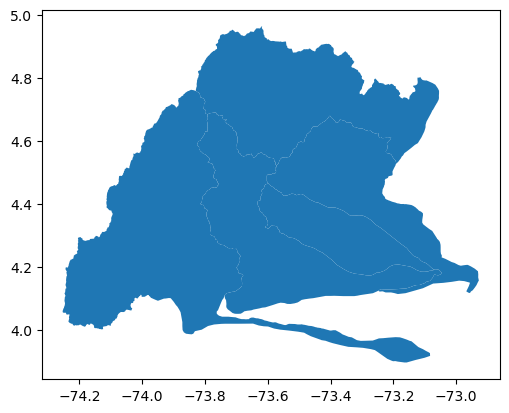

In [18]:
df_area_estudio.plot()

La segunda informacion de tipo vectorial presentan Unidad de Análisis Hidrológico (UAH) y la dinamica de caudales como resultado de implementar un modelo hidrologico por Nogales et al, 2012 en su estusio “Hydrological Modeling for Multifunctional Landscape Planning in the Orinoquia Region of Colombia”. Con este modelo se analizaron cinco diferentes escenarios de expansión agroindustrial, encontrando que la Orinoquia colombiana puede tener futuras altas presiones sobre áreas de recursos hídricos con cambios críticos en el régimen de disponibilidad hídrica.
La capa escenario 1 considera una expansión modesta de transformación del uso del suelo que maximiza los beneficios agrícolas

In [8]:
path_caudales_sc1 = r"C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/Estres_Hidrico/AE_HUA_SC1.shp"
df_caudales_sc1 = gpd.read_file(path_caudales_sc1)

In [98]:
path_caudales_sc4 = r"C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/Estres_Hidrico/AE_HUA_SC4.shp"
df_caudales_sc4 = gpd.read_file(path_caudales_sc1)

In [9]:
df_caudales_sc1.columns

Index(['SC1_BAU_Rn', 'Shape_Leng', 'Shape_Area', 'Area_Ha_CT', 'geometry'], dtype='object')

In [10]:
df_caudales_sc1.geometry

0     MULTIPOLYGON (((-74.12583 4.00125, -74.12651 4...
1     MULTIPOLYGON (((-73.51166 4.00025, -73.51177 4...
2     MULTIPOLYGON (((-73.82845 4.09146, -73.82845 4...
3     MULTIPOLYGON (((-73.04433 4.18642, -73.04433 4...
4     MULTIPOLYGON (((-73.85301 3.98751, -73.85301 3...
5     POLYGON ((-73.43829 4.76857, -73.43839 4.76857...
6     POLYGON ((-73.62385 4.14465, -73.62385 4.14454...
7     MULTIPOLYGON (((-74.03167 4.06833, -74.03238 4...
8     MULTIPOLYGON (((-73.11021 3.9083, -73.11025 3....
9     MULTIPOLYGON (((-73.08637 3.91543, -73.08637 3...
10    MULTIPOLYGON (((-73.70615 4.02174, -73.70615 4...
11    MULTIPOLYGON (((-73.30369 3.96426, -73.30369 3...
12    POLYGON ((-72.95296 4.14984, -72.95306 4.14984...
13    MULTIPOLYGON (((-73.21701 4.19488, -73.21701 4...
14    MULTIPOLYGON (((-73.08799 3.91771, -73.08799 3...
15    MULTIPOLYGON (((-73.49793 4.01632, -73.49793 4...
16    MULTIPOLYGON (((-73.10315 3.93629, -73.09601 3...
17    MULTIPOLYGON (((-73.43039 4.14875, -73.430

In [10]:
df_caudales_sc1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SC1_BAU_Rn  28 non-null     object  
 1   Shape_Leng  28 non-null     float64 
 2   Shape_Area  28 non-null     float64 
 3   Area_Ha_CT  28 non-null     float64 
 4   geometry    28 non-null     geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 1.2+ KB


La capa contiene 28 elemento geográficos de tipo polígono y multipolígono, que representan las Unidad de Análisis Hidrológico (UAH) y cinco columas 'SC1_BAU_Rn', 'Shape_Leng', 'Shape_Area', 'Area_Ha_CT', 'geometry'

<Axes: >

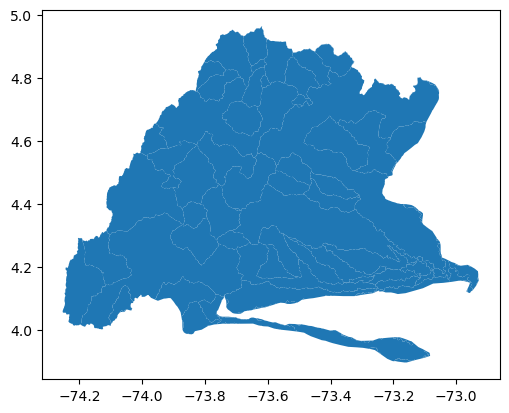

In [11]:
df_caudales_sc1.plot()

Se considera renombrar la columa SC1_BAU_Rn por Dn_Caudales_SC1 que ofrece una mejor descripción de la variable

In [12]:
df_caudales_sc1.rename(columns={'SC1_BAU_Rn': 'Dn_Caudales_SC1'})

,Dn_Caudales_SC1,Shape_Leng,Shape_Area,Area_Ha_CT,geometry
0,(-10) - (-5),271.599763,3.616381,4.434710e+06,"MULTIPOLYGON (((-74.12583 4.00125, -74.12651 4..."
1,(-15) - (-10),107.467283,1.635055,2.002150e+06,"MULTIPOLYGON (((-73.51166 4.00025, -73.51177 4..."
2,(-20) - (-15),55.849208,0.484959,5.938620e+05,"MULTIPOLYGON (((-73.82845 4.09146, -73.82845 4..."
3,(-25) - (-20),33.740853,0.308624,3.779845e+05,"MULTIPOLYGON (((-73.04433 4.18642, -73.04433 4..."
4,(-30) - (-25),26.088731,0.202857,2.486606e+05,"MULTIPOLYGON (((-73.85301 3.98751, -73.85301 3..."
5,(-35) - (-30),16.709244,0.136034,1.666887e+05,"POLYGON ((-73.43829 4.76857, -73.43839 4.76857..."
6,(-45) - (-40),11.469846,0.070217,8.604680e+04,"POLYGON ((-73.62385 4.14465, -73.62385 4.14454..."
7,(-5) - 0,394.841788,8.915917,1.095476e+07,"MULTIPOLYGON (((-74.03167 4.06833, -74.03238 4..."
8,(-50) - (-45),13.856133,0.082398,1.009548e+05,"MULTIPOLYGON (((-73.11021 3.9083, -73.11025 3...."
9,(-55) - (-50),17.169946,0.119208,1.460269e+05,"MULTIPOLYGON (((-73.08637 3.91543, -73.08637 3..."


# **Operaciones con datos de atributos**

In [13]:
df_caudales_sc1.iloc[:, 0:1]


,SC1_BAU_Rn
0,(-10) - (-5)
1,(-15) - (-10)
2,(-20) - (-15)
3,(-25) - (-20)
4,(-30) - (-25)
5,(-35) - (-30)
6,(-45) - (-40)
7,(-5) - 0
8,(-50) - (-45)
9,(-55) - (-50)


**Subconjunto de atributos vectoriales**

Se realiza el filtro para seleccionan las UAH cuya área es mayor o igual a 1.000.000 de hectáreas. Esta selección genera 7 registros de tipo multipoligono 

In [14]:
idx_UAH_mayores = df_caudales_sc1['Area_Ha_CT'] >= 1000000  
UAH_mayores= df_caudales_sc1[idx_UAH_mayores]
UAH_mayores

,SC1_BAU_Rn,Shape_Leng,Shape_Area,Area_Ha_CT,geometry
0,(-10) - (-5),271.599763,3.616381,4.434710e+06,"MULTIPOLYGON (((-74.12583 4.00125, -74.12651 4..."
1,(-15) - (-10),107.467283,1.635055,2.002150e+06,"MULTIPOLYGON (((-73.51166 4.00025, -73.51177 4..."
7,(-5) - 0,394.841788,8.915917,1.095476e+07,"MULTIPOLYGON (((-74.03167 4.06833, -74.03238 4..."
20,0-5,298.201963,6.967547,8.563038e+06,"MULTIPOLYGON (((-74.14943 4.10571, -74.14932 4..."
21,10-15,71.650680,0.854305,1.050999e+06,"MULTIPOLYGON (((-73.80235 4.55731, -73.80235 4..."
27,5-10,128.403218,1.726610,2.125116e+06,"MULTIPOLYGON (((-73.62385 4.14465, -73.62374 4..."


La tercera información vectorial corresponde al Mapa de ecosistemas continentales, marinos y costeros de Colombia 2017. Versión 2.1 (Subdirección de Ecosistemas e Información Ambiental - IDEAM, Grupo de Suelos y Tierras, 2017).

In [15]:
path_eco_AE = r"C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/Eco_AE.shp"
df_eco_AE = gpd.read_file(path_eco_AE)

In [16]:
df_eco_AE.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6441 non-null   int64   
 1   TIPO_ECOSI  6441 non-null   object  
 2   GRADO_TRAN  6441 non-null   object  
 3   GRAN_BIOMA  6441 non-null   object  
 4   BIOMA_PREL  6441 non-null   object  
 5   BIOMA_IAvH  6441 non-null   object  
 6   ECOS_SINTE  6441 non-null   object  
 7   ECOS_GENER  6441 non-null   object  
 8   UNIDAD_SIN  6441 non-null   object  
 9   AMBIENTE_A  6441 non-null   object  
 10  SUBSISTEMA  6441 non-null   object  
 11  ZONA_HIDRO  6441 non-null   object  
 12  ORIGEN      6441 non-null   object  
 13  TIPO_AGUA   6441 non-null   object  
 14  CLIMA       6441 non-null   object  
 15  PAISAJE     6441 non-null   object  
 16  RELIEVE     6441 non-null   object  
 17  SUELOS      6441 non-null   object  
 18  AMB_EDAFOG  6441 non-null   object  
 19

In [23]:
df_eco_AE.columns

Index(['OBJECTID', 'TIPO_ECOSI', 'GRADO_TRAN', 'GRAN_BIOMA', 'BIOMA_PREL',
       'BIOMA_IAvH', 'ECOS_SINTE', 'ECOS_GENER', 'UNIDAD_SIN', 'AMBIENTE_A',
       'SUBSISTEMA', 'ZONA_HIDRO', 'ORIGEN', 'TIPO_AGUA', 'CLIMA', 'PAISAJE',
       'RELIEVE', 'SUELOS', 'AMB_EDAFOG', 'DESC_AMB_E', 'COBERTURA',
       'SUSTRATO', 'ZONA', 'TEMPERATUR', 'SALINIDAD', 'PROVINCIA',
       'ECO_REGION', 'ECO_ZONA', 'ORIGEN_MAR', 'CONFIGURAC', 'CLAS_BIOTI',
       'SUBCLAS_BI', 'GRUPO_BIOT', 'SECTORES', 'Area_ha', 'UNI_BIOTIC',
       'ANFIBIOS', 'AVES', 'MAGNOLIOPS', 'MAMIFEROS', 'REPTILES', 'No_Anfibio',
       'No_Aves', 'No_Magnoli', 'No_Mamifer', 'No_Reptile', 'SHAPE_Leng',
       'SHAPE_Area', 'RULEID', 'geometry'],
      dtype='object')

In [17]:
valores_unicos = df_eco_AE['ECOS_SINTE'].unique()
print(valores_unicos)

['Bosque' 'Turbera' 'Sabana' 'Zona pantanosa' 'Laguna' 'Rio'
 'Transicional transformado' 'Cuerpo de agua artificial' 'Arbustal'
 'Herbazal' 'Complejos rocosos' 'Paramo' 'Sin informacion'
 'Agroecosistema' 'Bosque fragmentado' 'Territorio artificializado'
 'Vegetacion secundaria' 'Otras areas']


Se selecciona los datos por un atributo categórico Ecosistemas tipo Bosque cuya área sea mayor a 100 hectáreas y se presenta información asociada el Paisaje, Clima Cobertura y área, dado que es relevante conocerla para el proyecto final. Esta seleccion genera 329 registros

In [18]:
idx_area = df_eco_AE['Area_ha'] > 100
idx_ecositema = df_eco_AE['ECOS_SINTE'] == 'Bosque'
df_eco_AE.loc[idx_area & idx_ecositema, ['PAISAJE', 'CLIMA','COBERTURA', 'Area_ha']]

,PAISAJE,CLIMA,COBERTURA,Area_ha
9,Planicie aluvial,Calido Semihumedo,Bosque denso alto,310.323671
17,Planicie aluvial,Calido Humedo,Bosque de galeria y ripario,114.571112
20,Planicie aluvial,Calido Humedo,Bosque de galeria y ripario,131.725497
21,Planicie aluvial,Calido Humedo,Bosque de galeria y ripario,208.103205
23,Valle,Calido Humedo,Bosque de galeria y ripario,324.113112
...,...,...,...,...
1837,Montaña,Calido Humedo,Bosque denso alto,171.277032
1845,Piedemonte,Calido Superhumedo,Bosque denso alto,121.001354
1846,Planicie aluvial,Calido Humedo,Bosque denso alto,115.697646
1859,Piedemonte,Calido Humedo,Bosque de galeria y ripario,113.718250


Se selecciona por le atributo categórico Ecosistemas que relacionan a os ecositemas de tipo cultural como los agroecosistemas y Territorio artificializado y se presenta la información general del cosistema y el área. Esta selección arroja 3157 atributos

In [19]:
df_eco_AE[df_eco_AE['ECOS_SINTE'].isin(['Agroecosistema', 'Territorio artificializado'])]  \
    .loc[:, ['ECOS_GENER', 'Area_ha']]

,ECOS_GENER,Area_ha
1866,Agroecosistema de mosaico de cultivos y pastos,103.214672
1867,Agroecosistema de mosaico de cultivos y pastos,37.072386
1868,Agroecosistema de mosaico de cultivos y pastos,798.497576
1869,Agroecosistema de mosaico de cultivos y pastos,183.071662
1870,"Agroecosistema de mosaico de cultivos, pastos ...",218.988311
...,...,...
6342,Territorio artificializado,138.720610
6343,Territorio artificializado,25.592462
6344,Territorio artificializado,100.609650
6345,Territorio artificializado,89.676076


**Agregación de atributos vectoriales**

Se realiza la agregación en función de la variable ecosistemas general y se suma el total de hectáreas correspondientes a cada ecosistema. El resultado, en este caso, es una tabla (no espacial) con 17 filas, una por valor único en ecositema, y dos columnas que informan el nombre y el area de cada ecositema.

In [20]:
Eco_agg = df_eco_AE.groupby('ECOS_SINTE')[['Area_ha']].sum().reset_index()
Eco_agg

,ECOS_SINTE,Area_ha
0,Agroecosistema,556094.093987
1,Arbustal,829.429211
2,Bosque,168370.430549
3,Bosque fragmentado,90365.216654
4,Complejos rocosos,53792.263907
5,Cuerpo de agua artificial,1948.913481
6,Herbazal,856.474131
7,Laguna,660.550408
8,Otras areas,639.488641
9,Paramo,146139.494356


En el caso del dissolve se considera para mejorar proceso como geoprocesamiento disolver la subcuencas de la área de estudio en una única área 

In [21]:
df_area_estudio.columns

Index(['OBJECTID_1', 'COD_AH', 'COD_ZH', 'COD_SZH', 'NOM_AH', 'NOM_ZH',
       'NOM_SZH', 'Shape_Leng', 'Shape_Area', 'RULEID', 'Area_Ha', 'geometry'],
      dtype='object')

In [22]:
area_estudio_agg = df_area_estudio[['NOM_AH', 'NOM_ZH', 'geometry']] \
    .dissolve(by='NOM_AH', aggfunc='sum') \
    .reset_index()
area_estudio_agg

,NOM_AH,geometry,NOM_ZH
0,Orinoco,"POLYGON ((-73.7412 4.0991, -73.74513 4.09418, ...",MetaMetaMetaMetaMeta


<Axes: >

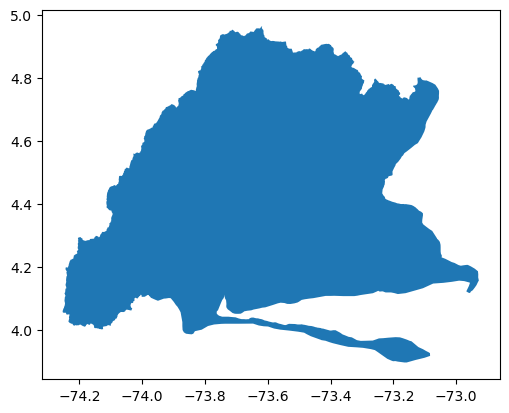

In [23]:
area_estudio_agg.plot()

# **Operaciones espaciales**

El recorte espacial es una forma de subconjunto espacial que implica cambios en las columnas de geometría de al menos algunas de las entidades afectadas. En este caso realizaremos el recorte de la capa de caudales_SC1 con el area del PNN Chingaza para evidenciar cual seria la dinamica en los caudales en esta zona protegida. Para realizar un clip (intersección geométrica) entre estas dos capas vectoriales empleando la función geopandas.clip()

In [7]:
path_PNN_Chingaza = r"C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/PNN/PNN_Chingaza.shp" 
df_PNN_chingaza = gpd.read_file(path_PNN_Chingaza)

<Axes: >

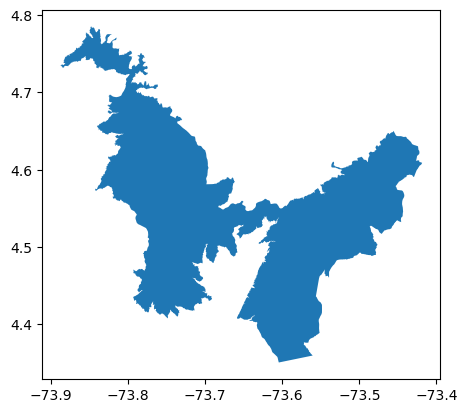

In [8]:
df_PNN_chingaza.plot()

Antes de realizar el clic reproyectamos los objetos df_caudales_sc1 y df_PNN_chingaza la cual está en sistema geográfico EPSG:4326, al sistema plano EPSG:4686 para procesar las capa en un mismo crs

In [26]:
df_caudales_sc1.crs.is_geographic

True

In [27]:
print(df_caudales_sc1.crs)

EPSG:4326


In [28]:
df_caudales_sc1_proj= df_caudales_sc1.to_crs(9377)
print("CRS reproyectado:", df_caudales_sc1_proj.crs)

CRS reproyectado: EPSG:9377


In [99]:
df_caudales_sc4_proj= df_caudales_sc4.to_crs(9377)
print("CRS reproyectado:", df_caudales_sc4_proj.crs)

CRS reproyectado: EPSG:9377


In [29]:
df_PNN_chingaza.crs.is_geographic

True

In [30]:
print(df_PNN_chingaza.crs)

EPSG:4686


In [9]:
PNN_chingaza_proj= df_PNN_chingaza.to_crs(9377)
print("CRS reproyectado:", PNN_chingaza_proj.crs)

CRS reproyectado: EPSG:9377


In [32]:
Caudales_PNN_SC1 = gpd.clip(df_caudales_sc1_proj, PNN_chingaza_proj)
print(Caudales_PNN_SC1)

       SC1_BAU_Rn  Shape_Leng  Shape_Area    Area_Ha_CT  \
3   (-25) - (-20)   33.740853    0.308624  3.779845e+05   
27           5-10  128.403218    1.726610  2.125116e+06   
1   (-15) - (-10)  107.467283    1.635055  2.002150e+06   
22          15-20   30.684765    0.333959  4.100973e+05   
0    (-10) - (-5)  271.599763    3.616381  4.434710e+06   
20            0-5  298.201963    6.967547  8.563038e+06   
7        (-5) - 0  394.841788    8.915917  1.095476e+07   
21          10-15   71.650680    0.854305  1.050999e+06   

                                             geometry  
3   MULTIPOLYGON (((4936767.758 2055726.301, 49368...  
27  MULTIPOLYGON (((4907487.957 2065350.816, 49075...  
1   MULTIPOLYGON (((4942232.896 2062109.083, 49422...  
22  POLYGON ((4916232.505 2051080.037, 4916244.497...  
0   MULTIPOLYGON (((4931265.755 2048707.858, 49312...  
20  MULTIPOLYGON (((4931253.747 2048695.885, 49312...  
7   MULTIPOLYGON (((4911019.871 2061628.149, 49110...  
21  MULTIPOLYGON (((

In [100]:
Caudales_PNN_SC4 = gpd.clip(df_caudales_sc4_proj, PNN_chingaza_proj)
print(Caudales_PNN_SC4)

       SC1_BAU_Rn  Shape_Leng  Shape_Area    Area_Ha_CT  \
3   (-25) - (-20)   33.740853    0.308624  3.779845e+05   
27           5-10  128.403218    1.726610  2.125116e+06   
1   (-15) - (-10)  107.467283    1.635055  2.002150e+06   
22          15-20   30.684765    0.333959  4.100973e+05   
0    (-10) - (-5)  271.599763    3.616381  4.434710e+06   
20            0-5  298.201963    6.967547  8.563038e+06   
7        (-5) - 0  394.841788    8.915917  1.095476e+07   
21          10-15   71.650680    0.854305  1.050999e+06   

                                             geometry  
3   MULTIPOLYGON (((4936767.758 2055726.301, 49368...  
27  MULTIPOLYGON (((4907487.957 2065350.816, 49075...  
1   MULTIPOLYGON (((4942232.896 2062109.083, 49422...  
22  POLYGON ((4916232.505 2051080.037, 4916244.497...  
0   MULTIPOLYGON (((4931265.755 2048707.858, 49312...  
20  MULTIPOLYGON (((4931253.747 2048695.885, 49312...  
7   MULTIPOLYGON (((4911019.871 2061628.149, 49110...  
21  MULTIPOLYGON (((

<Axes: >

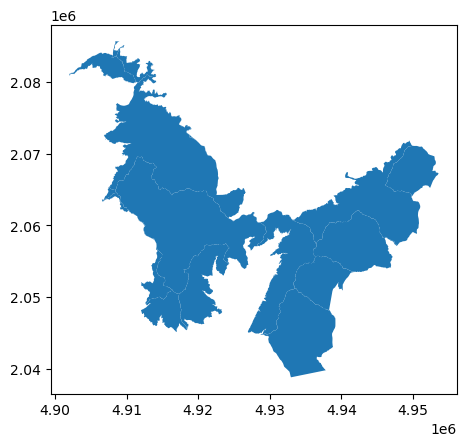

In [91]:
Caudales_PNN_SC1.plot()

In [92]:
Caudales_PNN_SC1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 8 entries, 3 to 21
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SC1_BAU_Rn  8 non-null      object  
 1   Shape_Leng  8 non-null      float64 
 2   Shape_Area  8 non-null      float64 
 3   Area_Ha_CT  8 non-null      float64 
 4   geometry    8 non-null      geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 384.0+ bytes


In [33]:
Caudales_PNN_SC1.iloc[:, 0:1]

,SC1_BAU_Rn
3,(-25) - (-20)
27,5-10
1,(-15) - (-10)
22,15-20
0,(-10) - (-5)
20,0-5
7,(-5) - 0
21,10-15


El área del PNN Chingaza comprende siete Unidades de Análisis hidrográfico con un rango de disminución del caudal (-25) - (-20)

Los buffers son polígonos que representan el área dentro de una distancia dada de una característica geométrica. En este caso utilizaremos la propuesta para definir áreas de amortiguación de áreas protegidas en Colombia para realizar el buffer. Para le cual definen un rango recomendado para áreas de amortiguación puede oscilar entre 5 km y 10 km alrededor de un área protegida.  En regiones críticas, los Andes tropicales, las áreas de amortiguación podrían extenderse aún más (hasta 20 km en algunos casos) para preservar corredores biológicos y mitigar impactos externos como la deforestación.

Primer definimos el área de amortiguación con el valor mínimo que es de 5k

In [34]:
PNN_chingaza_proj['A_Amortiguacion_5km'] = PNN_chingaza_proj.geometry.buffer(5000)

In [35]:
buffer_PNN_5k= PNN_chingaza_proj.set_geometry('A_Amortiguacion_5km')
buffer_PNN_5k

,objectid_1,nombre,categoria,territoria,resolucion,hectareas_,escala,organizaci,fecha_act,url,...,validado,hectarea_1,perimetro_,administra,id_pnn,record_id,app_id,AreHa_CT12,geometry,A_Amortiguacion_5km
0,193583,Chingaza,Parque Nacional Natural,Territorial Orinoquia,"154,154",77283.267,None,Parques Nacionales Naturales de Colombia,2011-06-30,https://runap.parquesnacionales.gov.co/area-pr...,...,Si,77283.274798,None,PNNC,48,2706,1,0.0,"POLYGON ((4906062.914 2086819.219, 4906064.808...","POLYGON ((4944091.834 2047801.505, 4944148.25 ..."


In [37]:
Area_Amortiguacion_5k_= buffer_PNN_5k.drop(columns=['geometry' ])

In [38]:
Area_Amortiguacion_5k_.to_file("Area_amortiguacion_5km.shp")
print(Area_Amortiguacion_5k_)

   objectid_1    nombre                categoria             territoria  \
0      193583  Chingaza  Parque Nacional Natural  Territorial Orinoquia   

  resolucion  hectareas_ escala                                organizaci  \
0    154,154   77283.267   None  Parques Nacionales Naturales de Colombia   

    fecha_act                                                url  ...  \
0  2011-06-30  https://runap.parquesnacionales.gov.co/area-pr...  ...   

   fecha_regi  validado    hectarea_1 perimetro_ administra  id_pnn record_id  \
0  2011-06-30        Si  77283.274798       None       PNNC      48      2706   

  app_id  AreHa_CT12                                A_Amortiguacion_5km  
0      1         0.0  POLYGON ((4944091.834 2047801.505, 4944148.25 ...  

[1 rows x 23 columns]


C:\Users\Leydi\AppData\Local\Temp\ipykernel_6460\2160575844.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Area_Amortiguacion_5k_.to_file("Area_amortiguacion_5km.shp")


<Axes: >

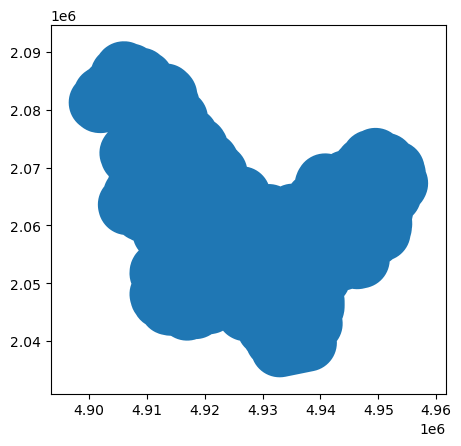

In [39]:
Area_Amortiguacion_5k_.plot()

Ahora, definimos el área de amortiguación con el valor máximo que es de 20k

In [40]:
PNN_chingaza_proj['A_Amortiguacion_20km'] = PNN_chingaza_proj.geometry.buffer(20000)

In [41]:
buffer_PNN_20k= PNN_chingaza_proj.set_geometry('A_Amortiguacion_20km')
buffer_PNN_20k

,objectid_1,nombre,categoria,territoria,resolucion,hectareas_,escala,organizaci,fecha_act,url,...,hectarea_1,perimetro_,administra,id_pnn,record_id,app_id,AreHa_CT12,geometry,A_Amortiguacion_5km,A_Amortiguacion_20km
0,193583,Chingaza,Parque Nacional Natural,Territorial Orinoquia,"154,154",77283.267,None,Parques Nacionales Naturales de Colombia,2011-06-30,https://runap.parquesnacionales.gov.co/area-pr...,...,77283.274798,None,PNNC,48,2706,1,0.0,"POLYGON ((4906062.914 2086819.219, 4906064.808...","POLYGON ((4944091.834 2047801.505, 4944148.25 ...","POLYGON ((4958027.574 2037494.498, 4957645.956..."


In [42]:
Area_Amortiguacion_20k= buffer_PNN_20k.drop(columns=['A_Amortiguacion_5km','geometry' ])

In [43]:
Area_Amortiguacion_20k.to_file("Area_amortiguacion_20km.shp")
print(Area_Amortiguacion_20k)

   objectid_1    nombre                categoria             territoria  \
0      193583  Chingaza  Parque Nacional Natural  Territorial Orinoquia   

  resolucion  hectareas_ escala                                organizaci  \
0    154,154   77283.267   None  Parques Nacionales Naturales de Colombia   

    fecha_act                                                url  ...  \
0  2011-06-30  https://runap.parquesnacionales.gov.co/area-pr...  ...   

   fecha_regi  validado    hectarea_1 perimetro_ administra  id_pnn record_id  \
0  2011-06-30        Si  77283.274798       None       PNNC      48      2706   

  app_id  AreHa_CT12                               A_Amortiguacion_20km  
0      1         0.0  POLYGON ((4958027.574 2037494.498, 4957645.956...  

[1 rows x 23 columns]


C:\Users\Leydi\AppData\Local\Temp\ipykernel_6460\1131355258.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Area_Amortiguacion_20k.to_file("Area_amortiguacion_20km.shp")


<Axes: >

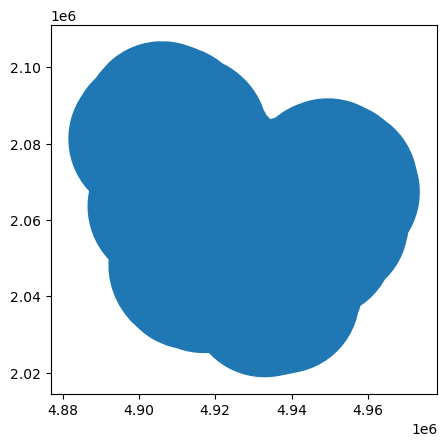

In [44]:
Area_Amortiguacion_20k.plot()

Utilizamos la zona buffer para identificar las Unidades de Análisis Hidrográfico que comprende el área de amortiguación con el de 20 kilometras alrededor del PNN Chingaza

In [45]:
interseccion_AAmort = gpd.overlay(df_caudales_sc1_proj, Area_Amortiguacion_20k, how="intersection")

In [46]:
interseccion_AAmort.to_file("caudales_Amoti_20k.shp")
print(interseccion_AAmort)

       SC1_BAU_Rn  Shape_Leng  Shape_Area    Area_Ha_CT  objectid_1    nombre  \
0    (-10) - (-5)  271.599763    3.616381  4.434710e+06      193583  Chingaza   
1   (-15) - (-10)  107.467283    1.635055  2.002150e+06      193583  Chingaza   
2   (-20) - (-15)   55.849208    0.484959  5.938620e+05      193583  Chingaza   
3   (-25) - (-20)   33.740853    0.308624  3.779845e+05      193583  Chingaza   
4   (-30) - (-25)   26.088731    0.202857  2.486606e+05      193583  Chingaza   
5   (-35) - (-30)   16.709244    0.136034  1.666887e+05      193583  Chingaza   
6        (-5) - 0  394.841788    8.915917  1.095476e+07      193583  Chingaza   
7   (-90) - (-85)   20.439300    0.139001  1.703969e+05      193583  Chingaza   
8   (-99) - (-95)   22.126088    0.196190  2.402756e+05      193583  Chingaza   
9            >100   53.307219    0.520430  6.376834e+05      193583  Chingaza   
10              0   13.232081    0.114912  1.411383e+05      193583  Chingaza   
11            0-5  298.20196

<Axes: >

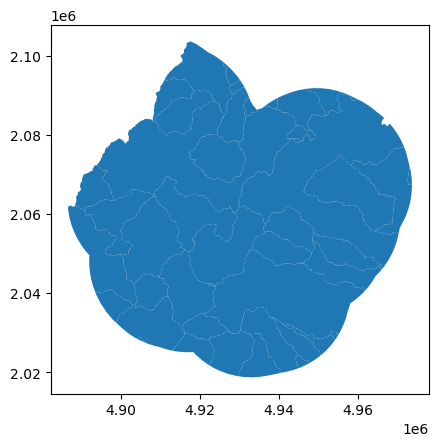

In [47]:
interseccion_AAmort.plot()

In [48]:
interseccion_AAmort.iloc[:, 0:1]

,SC1_BAU_Rn
0,(-10) - (-5)
1,(-15) - (-10)
2,(-20) - (-15)
3,(-25) - (-20)
4,(-30) - (-25)
5,(-35) - (-30)
6,(-5) - 0
7,(-90) - (-85)
8,(-99) - (-95)
9,>100


En el área de amortiguación con criterio de 20 km alrededor del PNN Chingaza comprende 17 Unidades de Análisis hidrográfico con un rango de disminución del caudal (-99) - (-95). En el área de amortiguación se estima que la reducción del caudal sea mucho mayor, casi en una perdida del caudal

In [79]:
Caudales_PNN_SC1['numeros_lista'] = Caudales_PNN_SC1['SC1_BAU_Rn'].str.findall(r'-?\d+')
Caudales_PNN_SC1

,SC1_BAU_Rn,Shape_Leng,Shape_Area,Area_Ha_CT,geometry,Index,numeros_lista
3,(-25) - (-20),33.740853,0.308624,3.779845e+05,"MULTIPOLYGON (((4936767.758 2055726.301, 49368...",0,"[-25, -20]"
27,5-10,128.403218,1.726610,2.125116e+06,"MULTIPOLYGON (((4907487.957 2065350.816, 49075...",1,"[5, -10]"
1,(-15) - (-10),107.467283,1.635055,2.002150e+06,"MULTIPOLYGON (((4942232.896 2062109.083, 49422...",2,"[-15, -10]"
22,15-20,30.684765,0.333959,4.100973e+05,"POLYGON ((4916232.505 2051080.037, 4916244.497...",3,"[15, -20]"
0,(-10) - (-5),271.599763,3.616381,4.434710e+06,"MULTIPOLYGON (((4931265.755 2048707.858, 49312...",4,"[-10, -5]"
20,0-5,298.201963,6.967547,8.563038e+06,"MULTIPOLYGON (((4931253.747 2048695.885, 49312...",5,"[0, -5]"
7,(-5) - 0,394.841788,8.915917,1.095476e+07,"MULTIPOLYGON (((4911019.871 2061628.149, 49110...",6,"[-5, 0]"
21,10-15,71.650680,0.854305,1.050999e+06,"MULTIPOLYGON (((4911031.88 2061640.123, 491103...",7,"[10, -15]"


In [80]:
Caudales_PNN_SC1['numeros_lista'] = Caudales_PNN_SC1['numeros_lista'].apply(lambda x: [int(num) for num in x])
Caudales_PNN_SC1

,SC1_BAU_Rn,Shape_Leng,Shape_Area,Area_Ha_CT,geometry,Index,numeros_lista
3,(-25) - (-20),33.740853,0.308624,3.779845e+05,"MULTIPOLYGON (((4936767.758 2055726.301, 49368...",0,"[-25, -20]"
27,5-10,128.403218,1.726610,2.125116e+06,"MULTIPOLYGON (((4907487.957 2065350.816, 49075...",1,"[5, -10]"
1,(-15) - (-10),107.467283,1.635055,2.002150e+06,"MULTIPOLYGON (((4942232.896 2062109.083, 49422...",2,"[-15, -10]"
22,15-20,30.684765,0.333959,4.100973e+05,"POLYGON ((4916232.505 2051080.037, 4916244.497...",3,"[15, -20]"
0,(-10) - (-5),271.599763,3.616381,4.434710e+06,"MULTIPOLYGON (((4931265.755 2048707.858, 49312...",4,"[-10, -5]"
20,0-5,298.201963,6.967547,8.563038e+06,"MULTIPOLYGON (((4931253.747 2048695.885, 49312...",5,"[0, -5]"
7,(-5) - 0,394.841788,8.915917,1.095476e+07,"MULTIPOLYGON (((4911019.871 2061628.149, 49110...",6,"[-5, 0]"
21,10-15,71.650680,0.854305,1.050999e+06,"MULTIPOLYGON (((4911031.88 2061640.123, 491103...",7,"[10, -15]"


In [81]:
numeros_expandidos = pd.DataFrame(Caudales_PNN_SC1['numeros_lista'].to_list(), index=Caudales_PNN_SC1.index)
numeros_expandidos

,0,1
3,-25,-20
27,5,-10
1,-15,-10
22,15,-20
0,-10,-5
20,0,-5
7,-5,0
21,10,-15


In [82]:
Caudales_PNN_SC1= Caudales_PNN_SC1.join(numeros_expandidos)
Caudales_PNN_SC1

,SC1_BAU_Rn,Shape_Leng,Shape_Area,Area_Ha_CT,geometry,Index,numeros_lista,0,1
3,(-25) - (-20),33.740853,0.308624,3.779845e+05,"MULTIPOLYGON (((4936767.758 2055726.301, 49368...",0,"[-25, -20]",-25,-20
27,5-10,128.403218,1.726610,2.125116e+06,"MULTIPOLYGON (((4907487.957 2065350.816, 49075...",1,"[5, -10]",5,-10
1,(-15) - (-10),107.467283,1.635055,2.002150e+06,"MULTIPOLYGON (((4942232.896 2062109.083, 49422...",2,"[-15, -10]",-15,-10
22,15-20,30.684765,0.333959,4.100973e+05,"POLYGON ((4916232.505 2051080.037, 4916244.497...",3,"[15, -20]",15,-20
0,(-10) - (-5),271.599763,3.616381,4.434710e+06,"MULTIPOLYGON (((4931265.755 2048707.858, 49312...",4,"[-10, -5]",-10,-5
20,0-5,298.201963,6.967547,8.563038e+06,"MULTIPOLYGON (((4931253.747 2048695.885, 49312...",5,"[0, -5]",0,-5
7,(-5) - 0,394.841788,8.915917,1.095476e+07,"MULTIPOLYGON (((4911019.871 2061628.149, 49110...",6,"[-5, 0]",-5,0
21,10-15,71.650680,0.854305,1.050999e+06,"MULTIPOLYGON (((4911031.88 2061640.123, 491103...",7,"[10, -15]",10,-15


In [93]:
Caudales_PNN_SC1 = Caudales_PNN_SC1.rename(columns={0: 'Max', 1: 'Min'})
Caudales_PNN_SC1

,SC1_BAU_Rn,Shape_Leng,Shape_Area,Area_Ha_CT,geometry,Index,numeros_lista,Max,Min
3,(-25) - (-20),33.740853,0.308624,3.779845e+05,"MULTIPOLYGON (((4936767.758 2055726.301, 49368...",0,"[-25, -20]",-25,-20
27,5-10,128.403218,1.726610,2.125116e+06,"MULTIPOLYGON (((4907487.957 2065350.816, 49075...",1,"[5, -10]",5,-10
1,(-15) - (-10),107.467283,1.635055,2.002150e+06,"MULTIPOLYGON (((4942232.896 2062109.083, 49422...",2,"[-15, -10]",-15,-10
22,15-20,30.684765,0.333959,4.100973e+05,"POLYGON ((4916232.505 2051080.037, 4916244.497...",3,"[15, -20]",15,-20
0,(-10) - (-5),271.599763,3.616381,4.434710e+06,"MULTIPOLYGON (((4931265.755 2048707.858, 49312...",4,"[-10, -5]",-10,-5
20,0-5,298.201963,6.967547,8.563038e+06,"MULTIPOLYGON (((4931253.747 2048695.885, 49312...",5,"[0, -5]",0,-5
7,(-5) - 0,394.841788,8.915917,1.095476e+07,"MULTIPOLYGON (((4911019.871 2061628.149, 49110...",6,"[-5, 0]",-5,0
21,10-15,71.650680,0.854305,1.050999e+06,"MULTIPOLYGON (((4911031.88 2061640.123, 491103...",7,"[10, -15]",10,-15


In [95]:
Caudales_PNN_SC1.columns

Index(['SC1_BAU_Rn', 'Shape_Leng', 'Shape_Area', 'Area_Ha_CT', 'geometry',
       'Index', 'numeros_lista', 'Max', 'Min'],
      dtype='object')

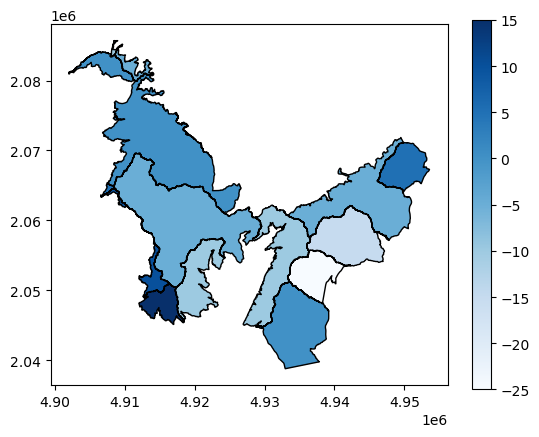

In [97]:
Caudales_PNN_SC1.plot(
  column='Max', 
  legend=True,
  cmap='Blues', edgecolor='black',
  missing_kwds={'color': 'grey', 'edgecolor': 'black'}
);

In [104]:
interseccion_AAmort['numeros_lista'] = interseccion_AAmort['SC1_BAU_Rn'].str.findall(r'-?\d+')


In [106]:
interseccion_AAmort['numeros_lista'] = interseccion_AAmort['numeros_lista'].apply(lambda x: [int(num) for num in x])

In [108]:
numeros_expandidos_am = pd.DataFrame(interseccion_AAmort['numeros_lista'].to_list(), index=interseccion_AAmort.index)

In [114]:
interseccion_AAmort= interseccion_AAmort.join(numeros_expandidos_am)

In [118]:
interseccion_AAmort = interseccion_AAmort.rename(columns={0: 'Max', 1: 'Min'})

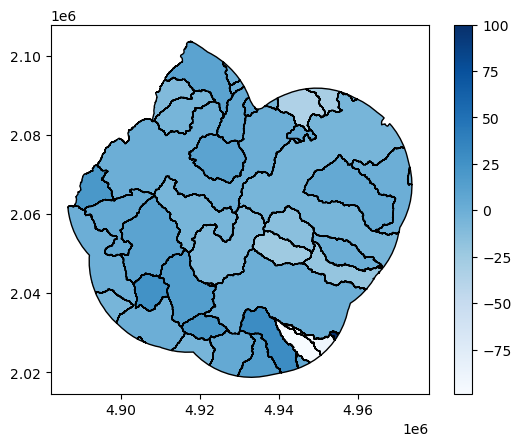

In [116]:
interseccion_AAmort.plot(
  column='Max', 
  legend=True,
  cmap='Blues', edgecolor='black',
  missing_kwds={'color': 'grey', 'edgecolor': 'black'}
);

# ** Spatial Operations on raster data**

In [5]:
import os
import math
import numpy as np
import rasterio
import rasterio.plot
import rasterio.mask
import rasterio.features
import rasterstats
from shapely.geometry import mapping

In [27]:
with rasterio.open(r"C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/DEM/mag_est.tif") as src:
    
    if PNN_chingaza_proj.crs != src.crs:
        PNN_chingaza_proj = PNN_chingaza_proj.to_crs(src.crs)
    
    geometries = [mapping(geom) for geom in PNN_chingaza_proj.geometry]
    
    out_image, out_transform = mask(src, geometries, crop=True)
    out_meta = src.meta.copy()
    
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

# 6. Guardar el raster recortado
output_path = r"C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/DEM/clipped_dem.tif"
with rasterio.open(output_path, "w", **out_meta) as dest:
    dest.write(out_image)

print(f"DEM recortado guardado en: {output_path}")

DEM recortado guardado en: C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/DEM/clipped_dem.tif


In [29]:
print(src.crs)

PROJCS["MAGNA_Transverse_Mercator",GEOGCS["MAGNA-SIRGAS",DATUM["Marco_Geocentrico_Nacional_de_Referencia",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6686"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4686"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",4.59620041666667],PARAMETER["central_meridian",-71.0775079166667],PARAMETER["scale_factor",1],PARAMETER["false_easting",1000000],PARAMETER["false_northing",1000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [30]:
type(src)

rasterio.io.DatasetReader

In [32]:
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 4822,
 'height': 3870,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["MAGNA_Transverse_Mercator",GEOGCS["MAGNA-SIRGAS",DATUM["Marco_Geocentrico_Nacional_de_Referencia",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6686"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4686"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",4.59620041666667],PARAMETER["central_meridian",-71.0775079166667],PARAMETER["scale_factor",1],PARAMETER["false_easting",1000000],PARAMETER["false_northing",1000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30.555555555556012, 0.0, 647157.3718854862,
        0.0, -30.555555555555014, 1041049.7338887563)}

In [21]:
from rasterio.mask import mask


In [34]:
with rasterio.open(r"C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/DEM/clipped_dem.tif") as src:
    dem_data = src.read(1)  # Leer la primera banda
    dem_extent = (
        src.bounds.left, src.bounds.right, 
        src.bounds.bottom, src.bounds.top
    )

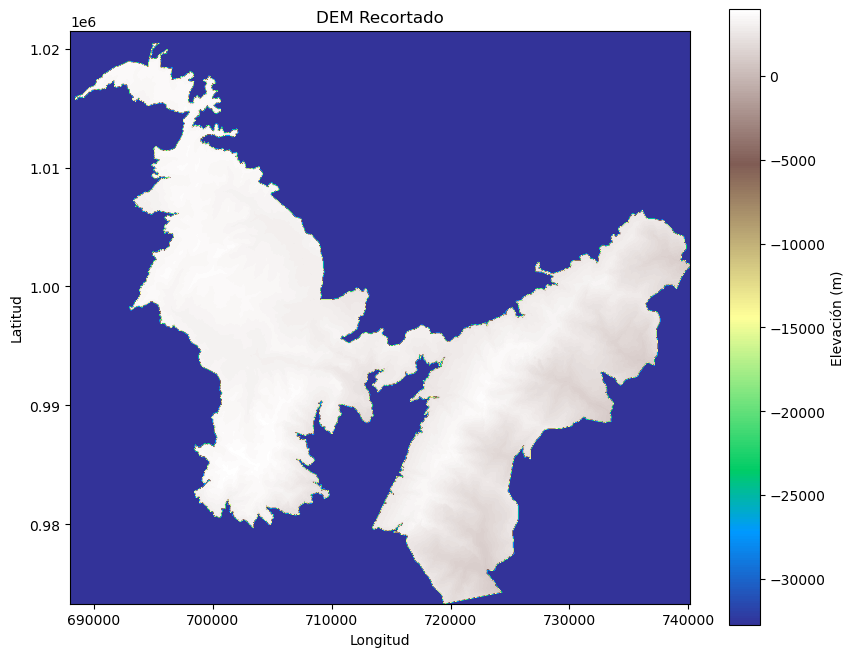

In [35]:
plt.figure(figsize=(10, 8))
plt.imshow(dem_data, cmap='terrain', extent=dem_extent)
plt.colorbar(label='Elevación (m)')
plt.title('DEM Recortado')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(visible=False)  
plt.show()

In [37]:
with rasterio.open(r"C:/Users/Leydi/Documents/PSIG/data/ProyectoFinalSIG/DEM/clipped_dem.tif") as src:
    dem_data = src.read(1) 
    dem_transform = src.transform  
    nodata = src.nodata  


if nodata is not None:
    dem_data = np.where(dem_data == nodata, np.nan, dem_data)


res_x = dem_transform[0]
res_y = -dem_transform[4]  


dz_dx = np.gradient(dem_data, axis=1) / res_x  
dz_dy = np.gradient(dem_data, axis=0) / res_y  


slope = np.sqrt(dz_dx**2 + dz_dy**2)
slope_deg = np.arctan(slope) * 180 / np.pi 


aspect = np.arctan2(-dz_dy, dz_dx)  
aspect_deg = (aspect * 180 / np.pi + 360) % 360  


Pendiente y aspecto

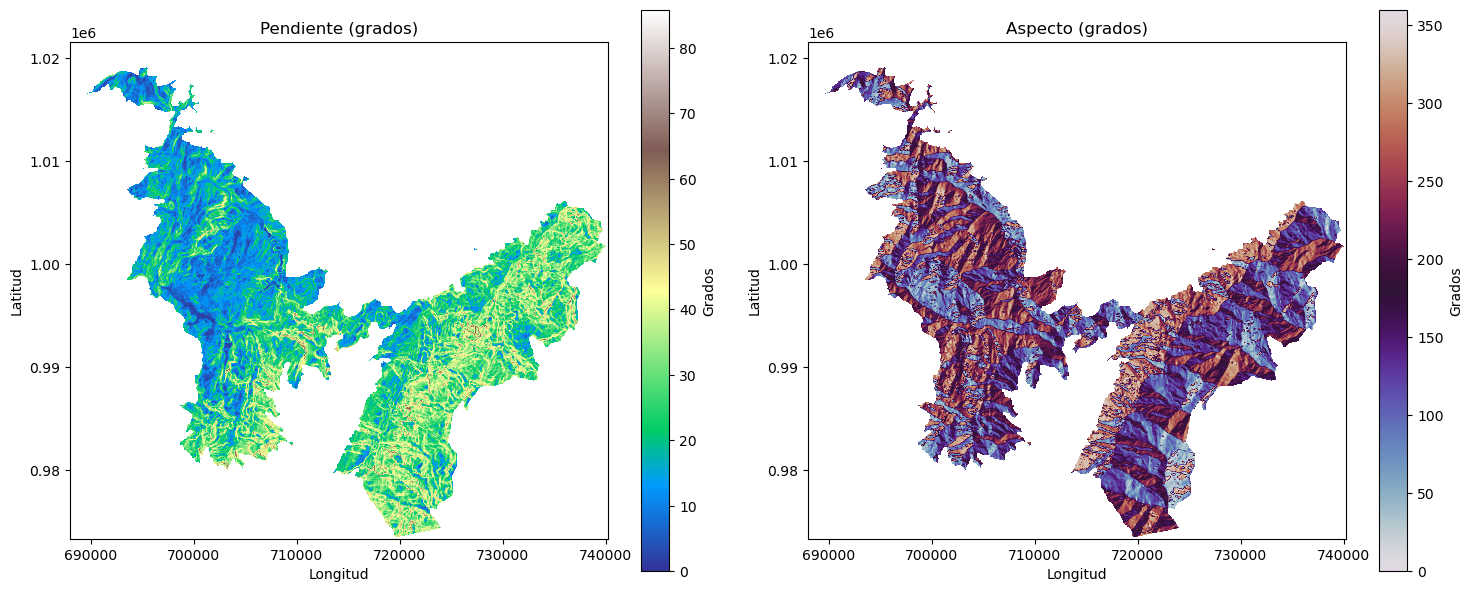

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].imshow(slope_deg, cmap='terrain', extent=(
    src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))
ax[0].set_title('Pendiente (grados)')
ax[0].set_xlabel('Longitud')
ax[0].set_ylabel('Latitud')
plt.colorbar(ax[0].images[0], ax=ax[0], label='Grados')


aspect_plot = ax[1].imshow(aspect_deg, cmap='twilight', extent=(
    src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))
ax[1].set_title('Aspecto (grados)')
ax[1].set_xlabel('Longitud')
ax[1].set_ylabel('Latitud')
plt.colorbar(aspect_plot, ax=ax[1], label='Grados')

plt.tight_layout()
plt.show()